In [65]:
#!/usr/bin/env julia

using PastaQ
using ITensors
using PyPlot

function PastaQ.gate(::GateName"R"; theta::Real, phi::Real)
    [
        cos(theta/2)    (-im * exp(-im * phi) * sin(theta/2))
        (-im * exp(im * phi) * sin(theta/2))     cos(theta/2)
    ]
end

function PastaQ.gate(::GateName"M"; Theta::Real)
    [
        cos(Theta)    0    0    (-im * sin(Theta))
        0    cos(Theta)    (-im * sin(Theta))    0
        0    (-im * sin(Theta))    cos(Theta)    0
        (-im * sin(Theta))    0    0    cos(Theta)
    ]
end

function run(N, depth)
    # Random circuit. 
    gates = Vector{Tuple}[]

    for i in 1:depth
        one_qubit_layer = Tuple[]
        two_qubit_layer = Tuple[]

        for j in 1:N
            gate = ("R", j, (theta=2pi*rand(), phi=2pi*rand()))
            push!(one_qubit_layer, gate)
        end

        # Alternate start qubit for pairs.
        idx_first = i % 2 + 1

        for j in idx_first:2:(N-1)
            gate = ("M", (j, j+1), (Theta=2pi*rand(),))
            push!(two_qubit_layer, gate)
        end

        push!(gates, one_qubit_layer)
        push!(gates, two_qubit_layer)
    end
    insert!(gates,(abs(rand(Int)) % size(gates)[1] + 1),[("X",(abs(rand(Int)) % N) + 1)])
#     @show gates
    psi = runcircuit(N, gates)
end


run (generic function with 1 method)

In [2]:

# N = 2
# depth = 2

# ψ = run(N, depth)
# @show ψ

In [3]:
N = 4
depth = 2

ψ = run(N, depth)
@show ψ

ψ = MPS
[1] IndexSet{2} (dim=2|id=633|"Qubit,Site,n=1") (dim=2|id=997|"Link,fact")
[2] IndexSet{3} (dim=2|id=997|"Link,fact") (dim=2|id=870|"Qubit,Site,n=2") (dim=2|id=600|"Link,fact")
[3] IndexSet{3} (dim=2|id=185|"Qubit,Site,n=3") (dim=2|id=600|"Link,fact") (dim=2|id=748|"Link,fact")
[4] IndexSet{2} (dim=2|id=748|"Link,fact") (dim=2|id=822|"Qubit,Site,n=4")



MPS
[1] IndexSet{2} (dim=2|id=633|"Qubit,Site,n=1") (dim=2|id=997|"Link,fact")
[2] IndexSet{3} (dim=2|id=997|"Link,fact") (dim=2|id=870|"Qubit,Site,n=2") (dim=2|id=600|"Link,fact")
[3] IndexSet{3} (dim=2|id=185|"Qubit,Site,n=3") (dim=2|id=600|"Link,fact") (dim=2|id=748|"Link,fact")
[4] IndexSet{2} (dim=2|id=748|"Link,fact") (dim=2|id=822|"Qubit,Site,n=4")


In [4]:
# contruct MPS of number X
function x_mps(N, x)
    gates = Vector{Tuple}[]
    one_qubit_layer = Tuple[]
    # create circuit
    for i in 1:N
        if x % 2 == 1
            gate = ("X",i)
            push!(one_qubit_layer, gate)
        end
        x = x÷2
    end
    push!(gates, one_qubit_layer)
#     @show gates
    psi = runcircuit(N, gates)
end

x_mps (generic function with 1 method)

In [5]:
N = 4
pr = Vector{Float64}(undef,2^N)
for i in 1:2^N
    temp_psi = x_mps(4,i-1)
    pr[i]= real(inner(temp_psi,ψ)*inner(temp_psi,ψ)')
end
@show pr

pr = [0.04855434084980573, 0.048216454259640405, 0.0640561428574693, 0.07680746277814196, 0.023534958242400712, 0.013385168652762226, 0.016912166254947122, 0.030072245965383382, 0.04065246809563592, 0.08846897800151336, 0.09630534074064248, 0.0676880397011605, 0.07096925432198599, 0.11388163733347585, 0.11486232422691828, 0.08563301771811739]


16-element Vector{Float64}:
 0.04855434084980573
 0.048216454259640405
 0.0640561428574693
 0.07680746277814196
 0.023534958242400712
 0.013385168652762226
 0.016912166254947122
 0.030072245965383382
 0.04065246809563592
 0.08846897800151336
 0.09630534074064248
 0.0676880397011605
 0.07096925432198599
 0.11388163733347585
 0.11486232422691828
 0.08563301771811739

In [6]:
sum = 0
for i in 1:16
    sum = sum + pr[i]
end
print(sum)

1.0000000000000007

In [7]:
y[1,2]

LoadError: UndefVarError: y not defined

In [63]:
# gates = Vector{Tuple}[]

# for i in 1:depth
#     one_qubit_layer = Tuple[]
#     two_qubit_layer = Tuple[]

#     for j in 1:N
#         gate = ("R", j, (theta=2pi*rand(), phi=2pi*rand()))
#         push!(one_qubit_layer, gate)
#     end

#     # Alternate start qubit for pairs.
#     idx_first = i % 2 + 1

#     for j in idx_first:2:(N-1)
#         gate = ("M", (j, j+1), (Theta=2pi*rand(),))
#         push!(two_qubit_layer, gate)
#     end

#     push!(gates, one_qubit_layer)
#     push!(gates, two_qubit_layer)
# end

# insert!(gates,(abs(rand(Int)) % size(gates)[1] + 1),[("X",(abs(rand(Int)) % N) + 1)])

# @show gates
# # psi = runcircuit(N, gates)

gates = Vector{Tuple}[[("R", 1, (theta = 4.27651852385255, phi = 6.066345493369977)), ("R", 2, (theta = 5.376833895091317, phi = 0.5056402815352872)), ("R", 3, (theta = 1.938464230770031, phi = 4.889799269025343)), ("R", 4, (theta = 1.5896028937616957, phi = 1.7432802610956266))], [("X", 1)], [("M", (2, 3), (Theta = 2.899897617301413,))], [("R", 1, (theta = 5.653963111907691, phi = 3.472163301961133)), ("R", 2, (theta = 2.0132044941051257, phi = 0.0029485135377043136)), ("R", 3, (theta = 1.853456927190203, phi = 3.8642771096522157)), ("R", 4, (theta = 4.273196574818118, phi = 0.873861406450702))], [("M", (1, 2), (Theta = 4.376240995150211,)), ("M", (3, 4), (Theta = 4.634050348093994,))]]


5-element Vector{Vector{Tuple}}:
 [("R", 1, (theta = 4.27651852385255, phi = 6.066345493369977)), ("R", 2, (theta = 5.376833895091317, phi = 0.5056402815352872)), ("R", 3, (theta = 1.938464230770031, phi = 4.889799269025343)), ("R", 4, (theta = 1.5896028937616957, phi = 1.7432802610956266))]
 [("X", 1)]
 [("M", (2, 3), (Theta = 2.899897617301413,))]
 [("R", 1, (theta = 5.653963111907691, phi = 3.472163301961133)), ("R", 2, (theta = 2.0132044941051257, phi = 0.0029485135377043136)), ("R", 3, (theta = 1.853456927190203, phi = 3.8642771096522157)), ("R", 4, (theta = 4.273196574818118, phi = 0.873861406450702))]
 [("M", (1, 2), (Theta = 4.376240995150211,)), ("M", (3, 4), (Theta = 4.634050348093994,))]

In [47]:
size(gates)[1]

4

In [23]:
insert!([6, 5, 4, 2, 1], 6, 3)

6-element Vector{Int64}:
 6
 5
 4
 2
 1
 3

In [46]:
rand_n = abs(rand(Int))
print(rand_n,"\n")
print(rand_n % N)

8386549061917812123
3

In [39]:
N

4

In [8]:
pr

16-element Vector{Float64}:
 0.04855434084980573
 0.048216454259640405
 0.0640561428574693
 0.07680746277814196
 0.023534958242400712
 0.013385168652762226
 0.016912166254947122
 0.030072245965383382
 0.04065246809563592
 0.08846897800151336
 0.09630534074064248
 0.0676880397011605
 0.07096925432198599
 0.11388163733347585
 0.11486232422691828
 0.08563301771811739

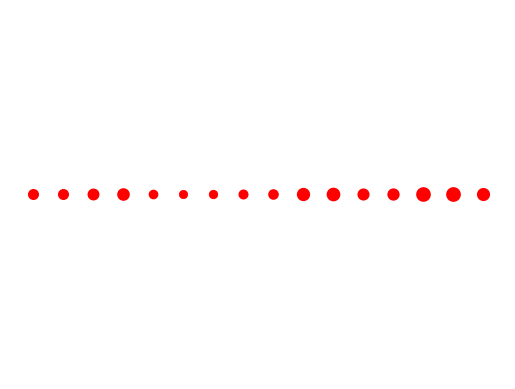

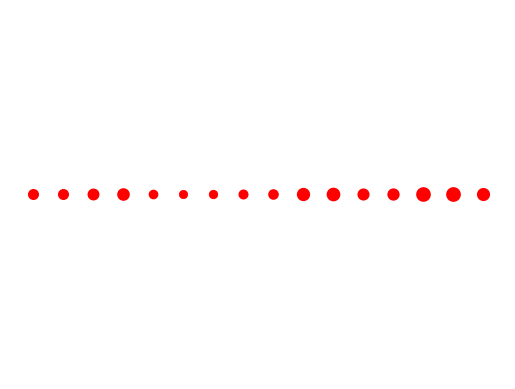

In [9]:
using PyPlot
for i in 0:2^N-1
    scatter(i,0,color="red",linewidth=40.0*pr[i+1])
end
axis("off")
fig = gcf()

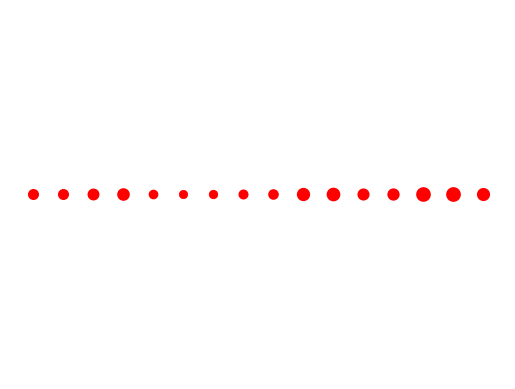

In [10]:
display(fig)

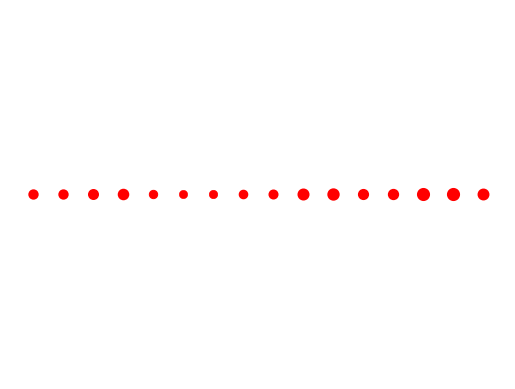

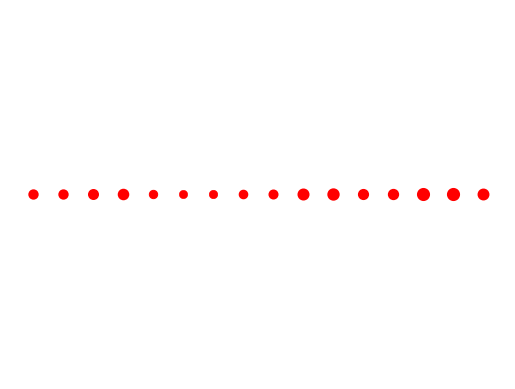

In [11]:
for i in 0:2^N-1
    scatter(i,0,color="red",linewidth=30.0*pr[i+1])
end
axis("off")
fig2 = gcf()

In [12]:
fig,fig2

(Figure(PyObject <Figure size 640x480 with 1 Axes>), Figure(PyObject <Figure size 640x480 with 1 Axes>))

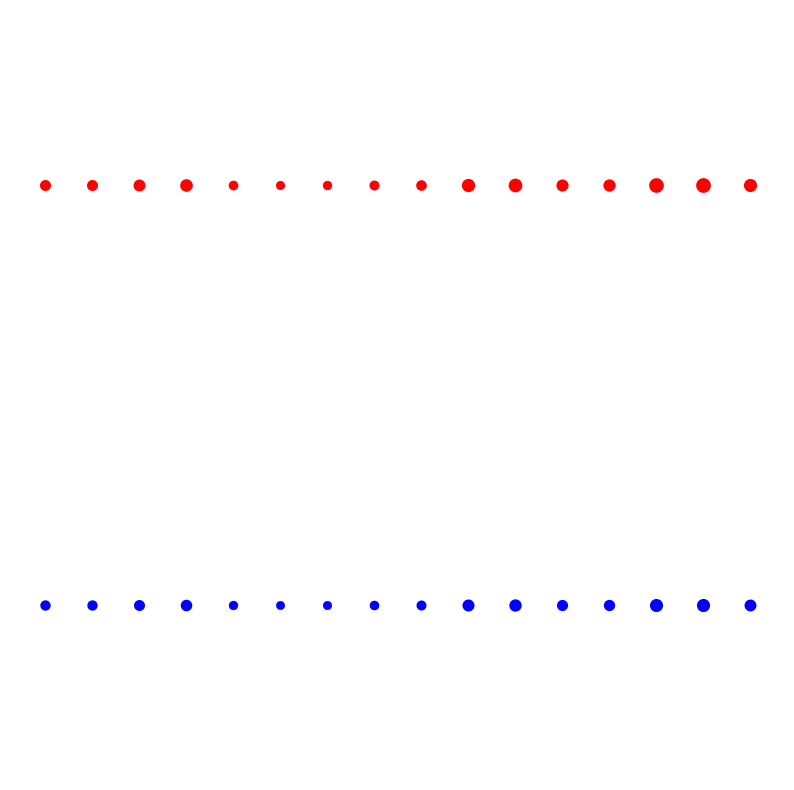

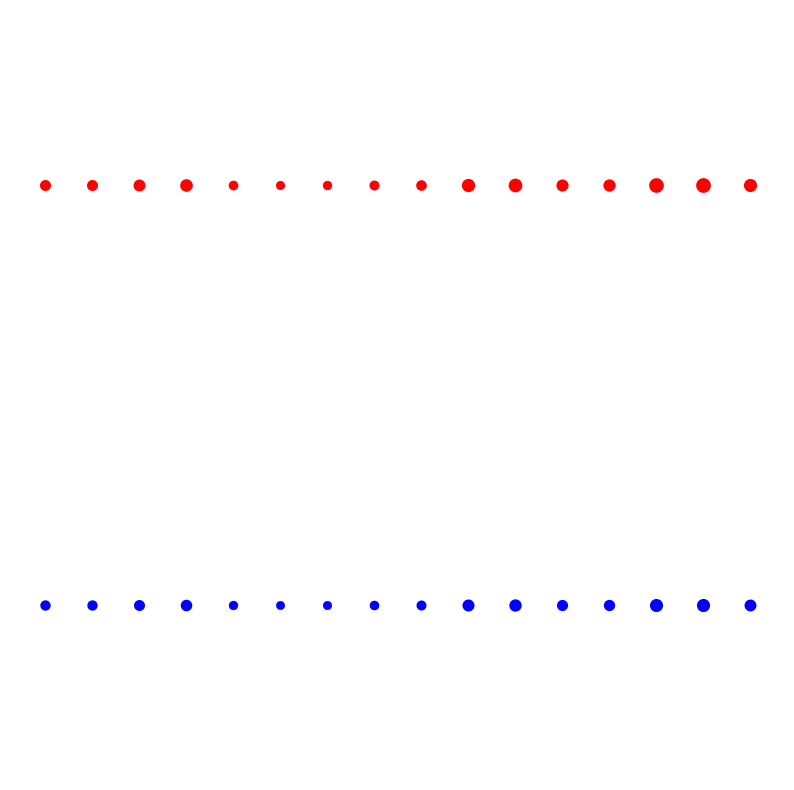

In [13]:
ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia
subfig = figure("pyplot_subplot_mixed",figsize=(10,10)) # Create a new blank figure
subplot(211) # Create the 1st axis of a 2x2 arrax of axes
for i in 0:2^N-1
    scatter(i,0,color="red",linewidth=40.0*pr[i+1])
end
axis("off")
subplot(212) # Create the 1st axis of a 2x2 arrax of axes
for i in 0:2^N-1
    scatter(i,0,color="blue",linewidth=30.0*pr[i+1])
end
axis("off")
gcf()

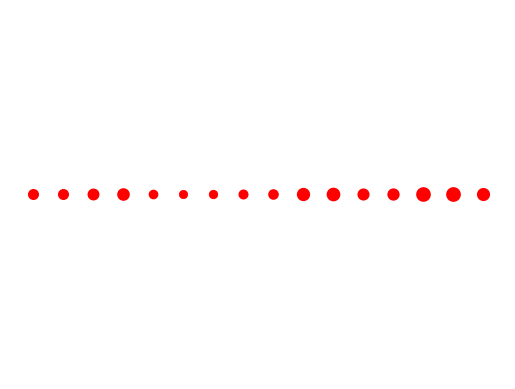

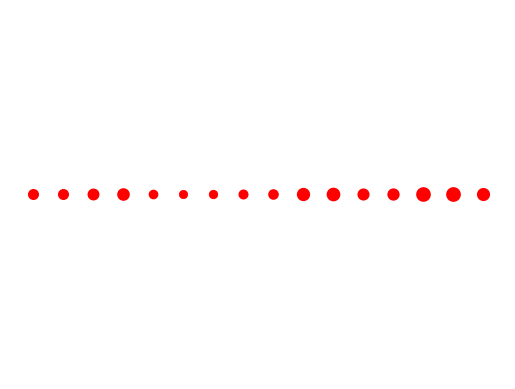

In [77]:
for i in 0:2^N-1
    scatter(i,0,color="red",linewidth=40.0*pr[i+1])
end
axis("off")
fig1 = gcf()
# for i in 0:2^N-1
#     scatter(i,0,color="blue",linewidth=30.0*pr[i+1])
# end
# axis("off")
fig2 = gcf()
display(fig1)

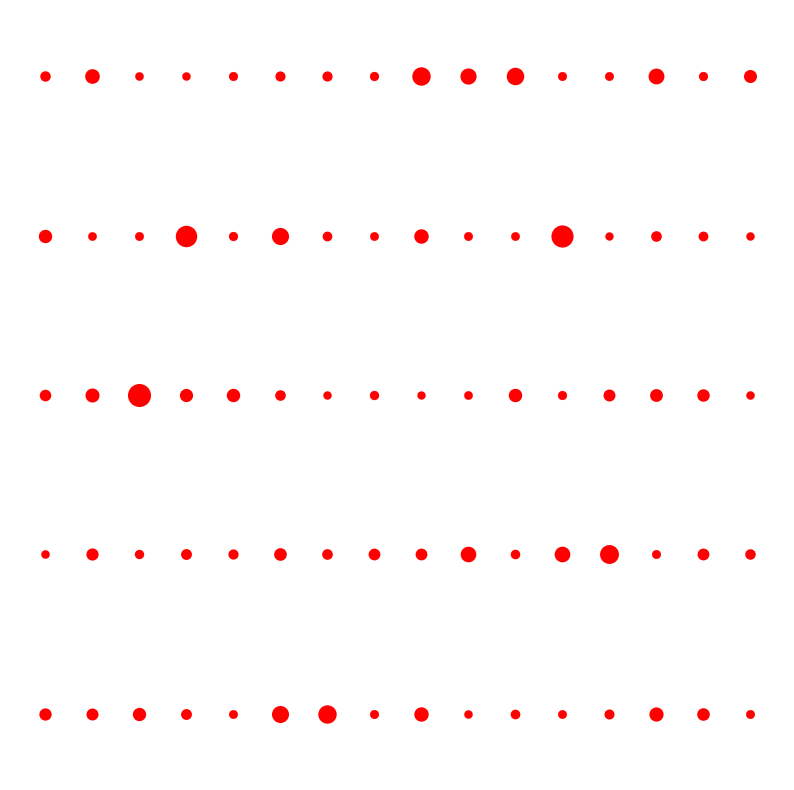

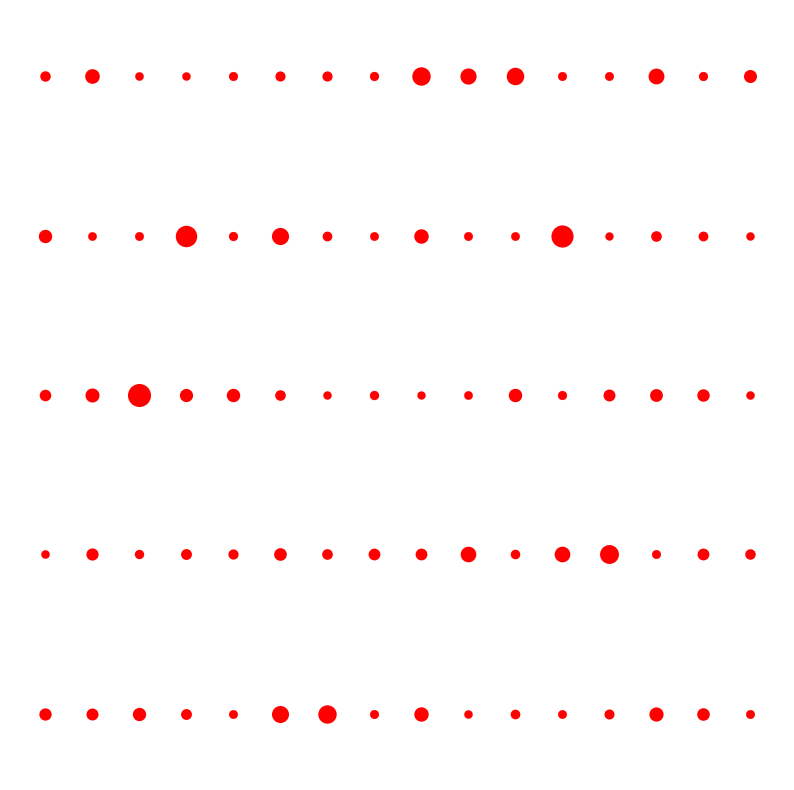

In [82]:
N = 4
depth = 10

ψ = run(N, depth)
# @show ψ

pr = Vector{Float64}(undef,2^N)
for i in 1:2^N
    temp_psi = x_mps(N,i-1)
    pr[i]= real(inner(temp_psi,ψ)*inner(temp_psi,ψ)')
end
# @show pr

subfig = figure("pyplot_subplot_mixed",figsize=(10,10)) # Create a new blank figure
subplot(511)
for i in 0:2^N-1
    scatter(i,0,color="red",linewidth=40.0*pr[i+1])
end
axis("off")


subplot(512)
ψ = run(N, depth)
for i in 1:2^N
    temp_psi = x_mps(N,i-1)
    pr[i]= real(inner(temp_psi,ψ)*inner(temp_psi,ψ)')
end
for i in 0:2^N-1
    scatter(i,0,color="red",linewidth=40.0*pr[i+1])
end
axis("off")

subplot(513)
ψ = run(N, depth)
for i in 1:2^N
    temp_psi = x_mps(N,i-1)
    pr[i]= real(inner(temp_psi,ψ)*inner(temp_psi,ψ)')
end
for i in 0:2^N-1
    scatter(i,0,color="red",linewidth=40.0*pr[i+1])
end
axis("off")

subplot(514)
ψ = run(N, depth)
for i in 1:2^N
    temp_psi = x_mps(N,i-1)
    pr[i]= real(inner(temp_psi,ψ)*inner(temp_psi,ψ)')
end
for i in 0:2^N-1
    scatter(i,0,color="red",linewidth=40.0*pr[i+1])
end
axis("off")

subplot(515)
ψ = run(N, depth)
for i in 1:2^N
    temp_psi = x_mps(N,i-1)
    pr[i]= real(inner(temp_psi,ψ)*inner(temp_psi,ψ)')
end
for i in 0:2^N-1
    scatter(i,0,color="red",linewidth=40.0*pr[i+1])
end
axis("off")


gcf()

In [67]:
repeat = 5
repeat_l = [1:repeat]
print(repeat_l)
@show repeat_l

UnitRange{Int64}[1:5]repeat_l = UnitRange{Int64}[1:5]


1-element Vector{UnitRange{Int64}}:
 1:5